In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
iris=datasets.load_iris()

data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})

print(data)



     sepal length  sepal width  petal length  petal width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]


In [3]:
from sklearn.model_selection import train_test_split

X = data[['sepal length',
    'sepal width',
    'petal length',
    'petal width']]

y = data["species"]

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size = 0.3)

from sklearn.ensemble import RandomForestClassifier

In [4]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
resultats = pd.DataFrame({"species_pred" : y_pred, "species_test" : y_test})
print(resultats)

     species_pred  species_test
38              0             0
56              1             1
8               0             0
17              0             0
117             2             2
127             2             2
2               0             0
84              1             1
12              0             0
36              0             0
81              1             1
7               0             0
16              0             0
51              1             1
120             2             2
57              1             1
32              0             0
139             2             2
33              0             0
125             2             2
98              1             1
42              0             0
115             2             2
131             2             2
76              1             1
130             2             2
137             2             2
86              1             1
110             2             2
93              1             1
87      

In [6]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [7]:
feature_imp = pd.Series(model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal length (cm)    0.450322
petal width (cm)     0.398574
sepal length (cm)    0.124805
sepal width (cm)     0.026299
dtype: float64

No handles with labels found to put in legend.


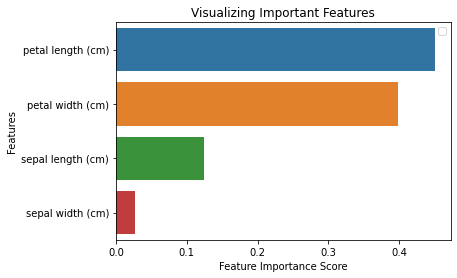

In [8]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [9]:
import yfinance as yf

In [10]:
ggle=yf.Ticker("GOOGL")

In [11]:
data = pd.DataFrame(ggle.history(period="max"))
#data=data[["Open","High","Low","Close","Volume"]]
data.tail()
print(data)

               Open     High      Low    Close    Volume  Dividends  \
Date                                                                  
2004-08-19    50.05    52.08    48.03    50.22  44659096          0   
2004-08-20    50.56    54.59    50.30    54.21  22834343          0   
2004-08-23    55.43    56.80    54.58    54.75  18256126          0   
2004-08-24    55.68    55.86    51.84    52.49  15247337          0   
2004-08-25    52.53    54.05    51.99    53.05   9188602          0   
...             ...      ...      ...      ...       ...        ...   
2021-03-15  2044.98  2054.99  2027.79  2054.44   1308400          0   
2021-03-16  2065.99  2113.68  2059.29  2083.89   1592800          0   
2021-03-17  2068.47  2099.00  2044.12  2082.22   1292400          0   
2021-03-18  2048.18  2068.75  2019.18  2021.34   1585000          0   
2021-03-19  2029.73  2037.04  2002.93  2026.96   2302700          0   

            Stock Splits  
Date                      
2004-08-19           0

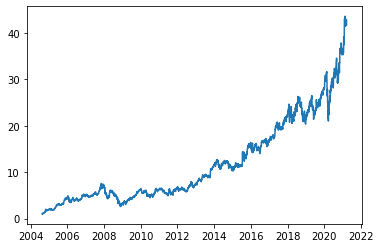

In [12]:
plt.plot(data["Low"]/data["Low"][0])
plt.show()

In [13]:
from finta import *
from finta.utils import resample



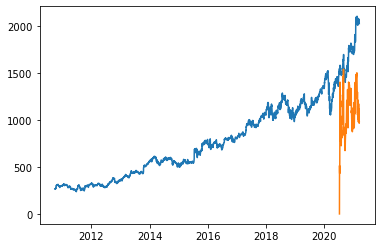

In [14]:
#plt.plot(TA.BBANDS(data[data["Low"]["2010-10-01":]]))
#plt.plot((data["Low"][4000:]+data["High"][4000:])/2)
plt.plot(data["Open"]["2010-10-01":])
plt.plot(TA.RSI(data[4000:])*20)
plt.show()

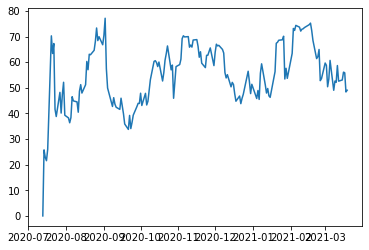

In [15]:
plt.plot(TA.RSI(data[4000:]))
plt.show()

In [16]:
cac40=yf.Ticker("^FCHI")
loreal = yf.Ticker("OR.PA")


In [17]:
cac40_hist, loreal_hist = pd.DataFrame(cac40.history(period="max")),pd.DataFrame(loreal.history(period="max"))

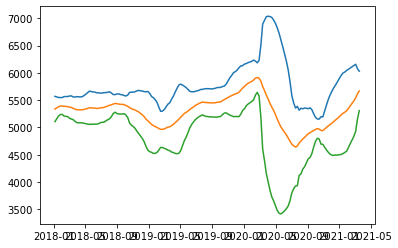

In [18]:
cac40_hist.columns = map(str.lower, cac40_hist.columns)
cac40_hist=resample(cac40_hist,"7d")
ind_weekly_p_change = TA.ROC(cac40_hist, period=1)
ind_bbands = TA.BBANDS(cac40_hist)


plt.plot(ind_bbands["2018":])
plt.show()

Date
1990-03-01         NaN
1990-03-08    3.510638
1990-03-15   -0.411100
1990-03-22    0.051600
1990-03-29    3.197524
                ...   
2021-02-18    0.557421
2021-02-25    0.553296
2021-03-04    2.752802
2021-03-11    1.072856
2021-03-18   -0.939087
Freq: 7D, Name: ROC, Length: 1621, dtype: float64


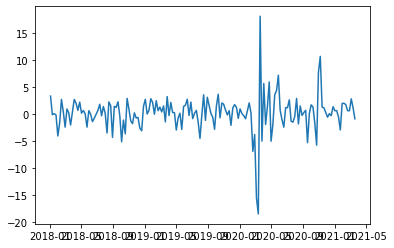

In [19]:
plt.plot(ind_weekly_p_change["2018":])
#plt.plot(cac40_hist["2018-01"])
print(ind_weekly_p_change)

In [101]:
#Création du dataset
stock = yf.Ticker("OR.PA")
stock_hist = pd.DataFrame(stock.history(period="max"))
#On entraine le model sur la période 2012-2015 avec des prédictions à day +1
stock_hist.columns = map(str.lower, stock_hist.columns)
stock_data_set = pd.DataFrame()

seuil_achat=1
seuil_vente =1

stock_data_set["Spread BBands upper"] = (TA.BBANDS(stock_hist).BB_UPPER["2012":]-stock_hist["open"]["2012":])
stock_data_set["Spread BBands lower"] = (stock_hist["open"]["2012":]- TA.BBANDS(stock_hist).BB_LOWER["2012":])
stock_data_set["Daily p change"] = TA.ROC(resample(stock_hist,"1d"), period=1)["2012":]
stock_data_set["RSI"] = TA.RSI(stock_hist)
stock_data_set = stock_data_set.dropna()
def choice(dataset):
    l=[0]
    for k in range(1,len(dataset)):
        if dataset["Daily p change"][k]=="NaN" : l.append("Nan")
        else : n = dataset["Daily p change"][k]
        if dataset["Daily p change"][k-1]=="NaN" : p = dataset["Daily p change"][k-2]
        else : p = dataset["Daily p change"][k-1]
        if n-p>=seuil_achat : l.append(1)
        elif p-n>=seuil_vente : l.append(-1)
        else : l.append(0)
    if len(l)!=len(dataset) : raise ValueError("Problème de dim")
    return(l)
stock_data_set["went_up"] = choice(stock_data_set)


yo = ["Spread BBands upper","Spread BBands lower","Daily p change","RSI","went_up"] 
        



X_train = stock_data_set[:"2016"]
y_train = stock_data_set["went_up"][:"2016"]
X_test = stock_data_set["2016":"2017"]
y_test = stock_data_set["went_up"]["2016":"2017"]
prices = stock_hist["2016":"2017"].dropna()
#Ajustements
X_train,X_test = X_train[:-1],X_test[:-1]
y_train,y_test = y_train[1:],y_test[1:]









In [102]:
X_test

,Spread BBands upper,Spread BBands lower,Daily p change,RSI,went_up
Date,,,,,
2016-01-05,9.497527,1.816527,0.396214,38.967412,0
2016-01-06,10.637809,1.234809,-0.131550,38.720516,0
2016-01-07,12.442529,-1.365471,-0.292719,38.142167,0
2016-01-08,9.834294,1.652294,-0.829358,36.484271,0
2016-01-12,11.881203,1.008203,1.148225,39.053578,1
...,...,...,...,...,...
2017-12-19,0.508613,4.809613,-0.812735,53.809125,-1
2017-12-20,1.422588,3.763588,-1.056736,47.948971,0
2017-12-21,3.290238,1.860238,0.668228,51.507394,1


In [103]:
len(y_pred)

407

In [104]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
df = pd.DataFrame({"Change" : X_test["Daily p change"], "Y_pred" : y_pred})
df["2016-01"]


,Change,Y_pred
Date,,
2016-01-05,0.396214,0
2016-01-06,-0.131550,0
2016-01-07,-0.292719,0
2016-01-08,-0.829358,1
2016-01-12,1.148225,0
2016-01-13,0.530739,-1
2016-01-14,-2.082417,0
2016-01-15,-1.385353,1
2016-01-19,1.982746,-1


,action_pred,action_test
Date,,
2016-01-06,0,0
2016-01-07,0,0
2016-01-08,0,0
2016-01-12,1,1
2016-01-13,0,0
...,...,...
2017-12-20,0,0
2017-12-21,1,1
2017-12-22,0,-1


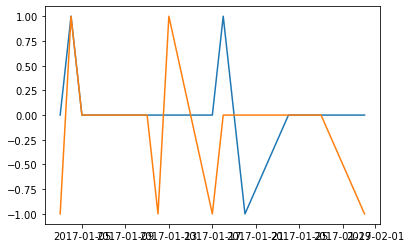

In [105]:
resultats = pd.DataFrame({"action_pred" : y_pred, "action_test" : y_test})
plt.plot(resultats["2017-01"])
resultats

In [108]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#len(X_test)==len(y_pred)
len(y_pred)==len(y_test)

prices

Accuracy: 0.8427518427518428


,open,high,low,close,volume,dividends,stock splits
Date,,,,,,,
2016-01-04,137.78,138.69,135.25,136.29,886496,0.0,0.0
2016-01-05,137.65,137.87,134.17,136.83,685509,0.0,0.0
2016-01-06,136.43,137.15,135.03,136.65,737208,0.0,0.0
2016-01-07,133.67,136.92,133.31,136.25,1180024,0.0,0.0
2016-01-08,136.02,136.92,135.12,135.12,1114553,0.0,0.0
...,...,...,...,...,...,...,...
2017-12-21,175.09,176.26,173.63,176.26,447629,0.0,0.0
2017-12-22,175.93,176.73,174.38,175.04,356697,0.0,0.0
2017-12-27,174.81,176.35,174.57,175.79,237259,0.0,0.0


In [124]:
def profit_ToR(df=df):
    acc = 100
    portf = 0
    i=1
    l = [[acc,portf]]
    while df["Y_pred"][i]!=1 : 
        i+=1
        l.append(l[-1])
    print(i)
    e,f,g =0,0,0
    while i<len(df):
        if df["Y_pred"][i]==1 and l[-1][0]!=0: l.append([0,l[-1][0]/prices["open"][i]])
        elif df["Y_pred"][i]==-1 and l[-1][1]!=0: l.append([l[-1][1]*prices["open"][i],0])
        else  : l.append(l[-1])
        i+=1
    print(i)
    df["Money"]=l
    return(df)
    
    
a=profit_ToR()
a.tail()  
    
    
        
    
    
    
    

3
407


,Change,Y_pred,Money
Date,,,
2017-12-19,-0.812735,0,"[92.25758874539505, 0]"
2017-12-20,-1.056736,1,"[0, 0.5531362116757303]"
2017-12-21,0.668228,0,"[0, 0.5531362116757303]"
2017-12-22,-0.692159,1,"[0, 0.5531362116757303]"
2017-12-28,-0.984129,0,"[0, 0.5531362116757303]"


In [125]:
test = model.predict(stock_data_set["2019-01"])

In [127]:
test
stock_data_set["2019-01"]

,Spread BBands upper,Spread BBands lower,Daily p change,RSI,went_up
Date,,,,,
2019-01-03,13.850018,3.530018,-1.201784,39.908059,-1
2019-01-04,11.871788,3.605788,1.418251,45.848230,1
2019-01-08,12.300621,2.882621,0.604775,44.284847,0
2019-01-09,9.703285,5.539285,-0.801519,41.725394,-1
2019-01-10,12.269490,2.502490,0.558154,44.127650,1
2019-01-11,8.645530,5.048530,-0.100439,43.775989,0
2019-01-15,7.396295,2.541295,0.507967,42.650300,0
2019-01-16,6.058628,3.407628,-0.835240,39.767932,-1
2019-01-17,7.059132,1.693132,0.767167,43.512492,1


In [129]:
feature_imp = pd.Series(model.feature_importances_,index=["Spread BBands upper","Spread BBands lower","Daily p change","RSI","went_up"]).sort_values(ascending=False)
feature_imp

Daily p change         0.399967
RSI                    0.191486
Spread BBands upper    0.178134
Spread BBands lower    0.174995
went_up                0.055418
dtype: float64

No handles with labels found to put in legend.


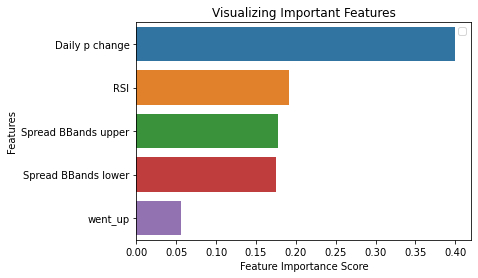

In [130]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()